In [46]:
from pathlib import Path

ROOT = Path("dataset-here") #Путь до папки с датасетом

train_image_path = ROOT / "train/images/"
train_mask_path = ROOT / "train/mask/"
test_image_path = ROOT / "test/images/"
solution_image_path = './sample_solution/'

In [47]:
ALL_IMAGES = sorted(train_image_path.glob("*.png"))
len(ALL_IMAGES)

8203

In [48]:
ALL_MASKS = sorted(train_mask_path.glob("*.png"))
len(ALL_MASKS)

8203

In [53]:
import random
import matplotlib.pyplot as plt
import numpy as np
import cv2


def show_images(image, mask, name):
    plt.figure(figsize=(20, 20))
    plt.subplot(1, 2, 1)
    plt.title(name)
    plt.imshow(image)
    plt.subplot(1, 2, 2)
    plt.title(name)
    plt.imshow(mask*30)
    
 
def show_random(paths):
    length = len(paths)
    index = random.randint(0, length - 1)
    name = paths[index].name
    image_path = str(paths[index])
    mask_path = image_path.replace('images', 'mask')
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    mask = cv2.imread(mask_path)
    show_images(image, mask, name)



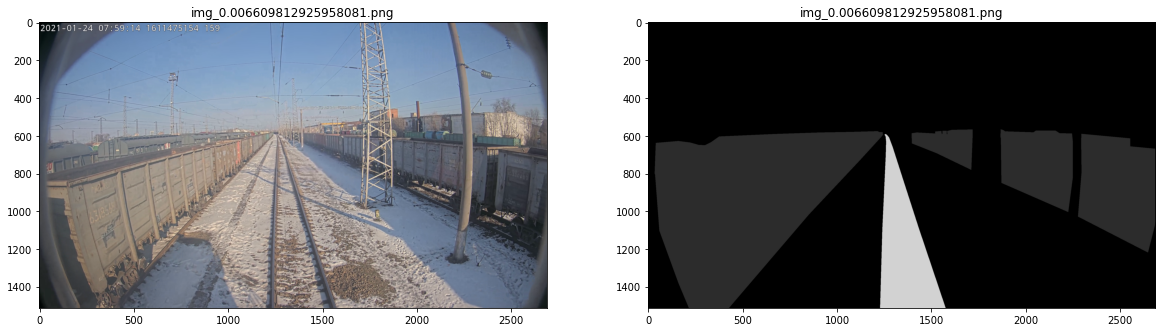

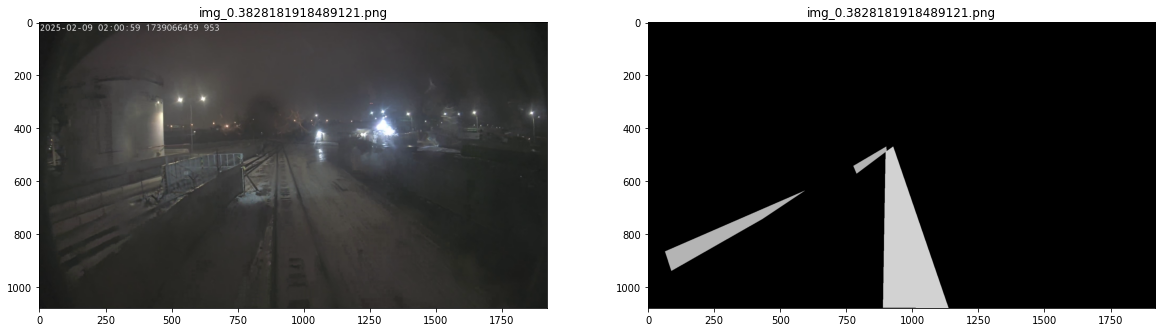

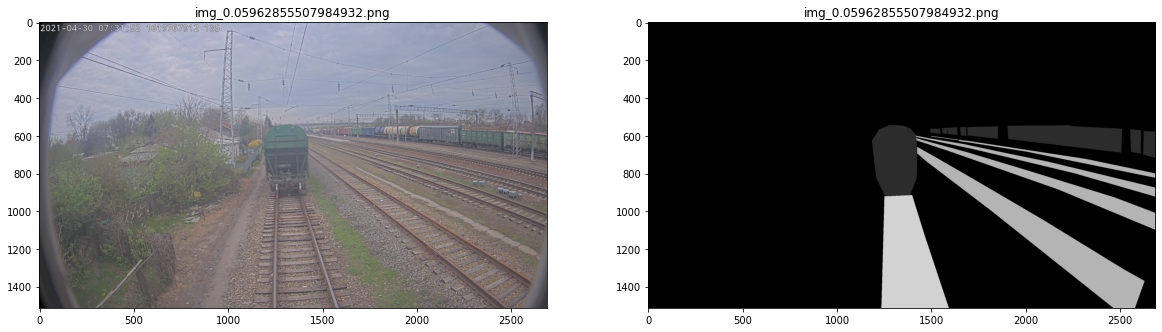

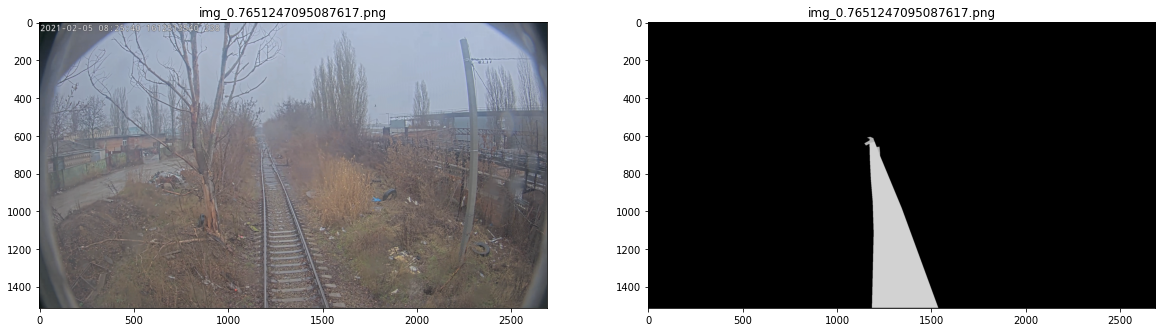

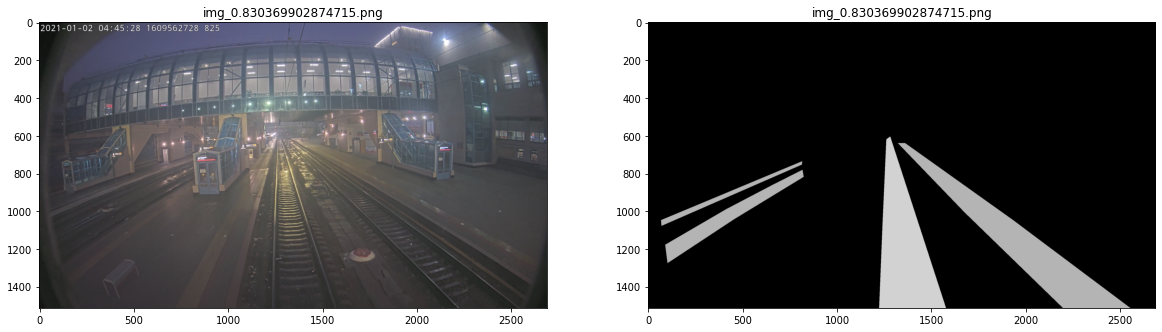

In [54]:
for i in range(0, 5):
    show_random(ALL_IMAGES)

In [37]:
from tqdm import tqdm

MAX_HIST_VALUES = []

for img_path, mask_path in tqdm(zip(ALL_IMAGES, ALL_MASKS)):
    img = cv2.imread(str(img_path))
    mask = cv2.imread(str(mask_path))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    hist_full = cv2.calcHist([img[:,:,0]],[0],None,[256],[0,256])
    max_value = np.argmax(hist_full)
    MAX_HIST_VALUES.append(max_value)

8203it [16:15,  8.41it/s]


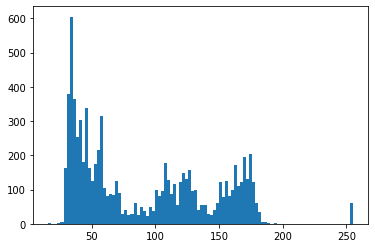

In [38]:
#Просмотр распределения наибольших значений гистограмм изображений

plt.hist(MAX_HIST_VALUES, bins=100);